In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import SGDClassifier


In [126]:
df = pd.read_csv('titanic.csv')

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nulls?

As we can see there are some nulls in *Age*, *Cabin* and *Embarked*

In [129]:
df[(df['Embarked'].isna()) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [130]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
titanic_df = df.copy()

Duplicates?

In [132]:
titanic_df.duplicated().sum()

0

Fill Null Values:

In [133]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

C:\Users\RAYANEH INS\AppData\Local\Temp\ipykernel_17580\3178132373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [134]:
# Fill 'Embarked' with the most frequent value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode())

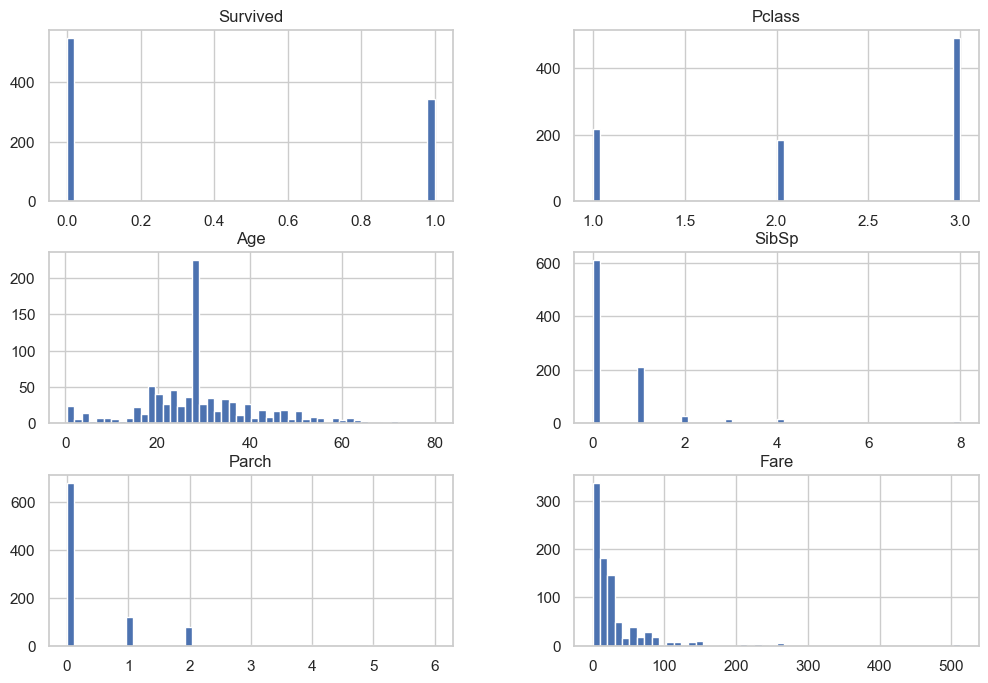

In [135]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_df.hist(column= cols, figsize=(12,8), bins=50)
plt.show()

The distribution of Survived passengers:

In [136]:
titanic_df.shape

(891, 12)

In [137]:
survived = titanic_df['Survived'].value_counts()[1]
survived_percent = survived/titanic_df['Survived'].shape[0] * 100
not_survived = titanic_df['Survived'].value_counts()[0]
not_survived_percent = not_survived/titanic_df['Survived'].shape[0] * 100
print('{} of passengers survived which is {:.2f}%. '.format(survived, survived_percent))
print("{} of passengers didn't survived which is {:.2f}%. ".format(not_survived ,not_survived_percent))

342 of passengers survived which is 38.38%. 
549 of passengers didn't survived which is 61.62%. 


C:\Users\RAYANEH INS\AppData\Local\Temp\ipykernel_17580\1111946572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Survived', data= titanic_df, palette='husl', width=0.3, stat='percent')


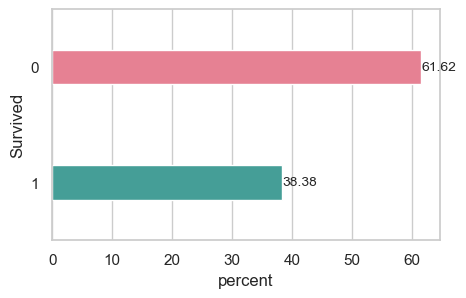

In [138]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(y='Survived', data= titanic_df, palette='husl', width=0.3, stat='percent')
for i in ax.containers:
    ax.bar_label(i, fontsize= 10, fmt = '%.2f')


How passengers had been survived base on their ages:

In [139]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

<Axes: xlabel='Age', ylabel='Percent'>

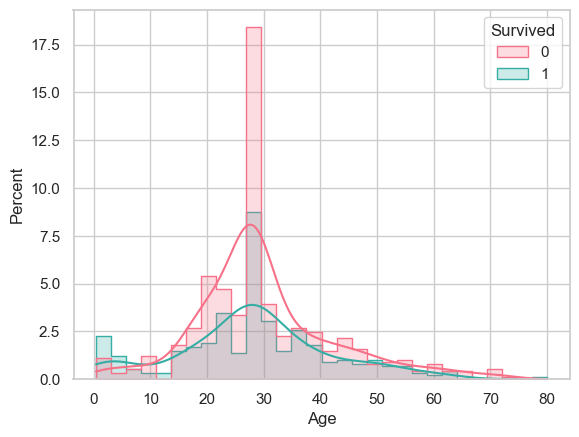

In [140]:
sns.histplot(data=titanic_df, x='Age', hue='Survived',
              kde=True, bins=30, palette='husl', stat='percent', element='step')

*'AgeRange'*:
- The range of age in each decades.
- I'll put them in 6 ranges 

In [141]:
# titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], 
#                                 bins=[0.,10.,20.,30.,40., 50., 60., 70., np.inf],
#                                 labels=[1, 2, 3, 4, 5, 6, 7, 8])

In [142]:
def age_range(Age: 'feature') -> 'AgeRange':

    if  0. <= Age < 10.:
        return 1
    if 10. <= Age < 20.:
        return 2
    if 20. <= Age < 30.:
        return 3
    if 30. <= Age < 40.:
        return 4
    if 40. <= Age < 50.:
        return 5
    if 50. <= Age < 60.:
        return 6
    if 60. <= Age < 70.:
        return 7
    if Age >= 70.:
        return 8
    else:
        return 'unknown'

In [143]:
titanic_df['AgeRange'] = titanic_df['Age'].apply(age_range)

In [144]:
titanic_df.groupby(['AgeRange']).Survived.mean()

AgeRange
1    0.612903
2    0.401961
3    0.324937
4    0.437126
5    0.382022
6    0.416667
7    0.315789
8    0.142857
Name: Survived, dtype: float64

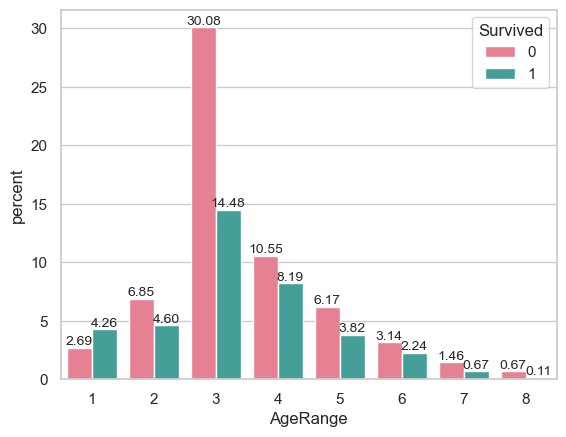

In [145]:
ax = sns.countplot(data=titanic_df, x='AgeRange', hue='Survived',
              stat='percent', palette='husl',)

for i in ax.containers:
    ax.bar_label(i, fontsize=10, fmt='%.2f')
# ax.tick_params(axis='x', rotation = 70)

being alive based on 'Sex':

In [146]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [147]:
# Percent of passengers based on their Gender
titanic_df['Sex'].value_counts()/titanic_df.shape[0] * 100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

In [148]:
# Percent of survived passengers based on their Gender
titanic_df.groupby(['Sex']).Survived.mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

C:\Users\RAYANEH INS\AppData\Local\Temp\ipykernel_17580\4031243051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Sex', data= titanic_df, palette='dark', width=0.5, stat= 'percent')


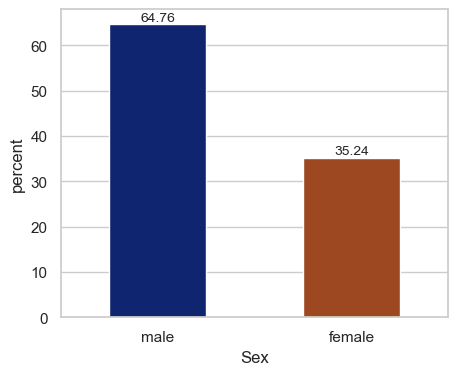

In [149]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x = 'Sex', data= titanic_df, palette='dark', width=0.5, stat= 'percent')
for i in ax.containers:
    ax.bar_label(i, fontsize = 10, fmt='%.2f')

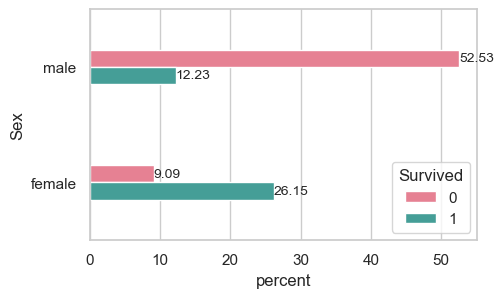

In [150]:
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
ax = sns.countplot(y='Sex', hue='Survived', data= titanic_df, palette='husl', width=0.3, stat='percent')
for i in ax.containers:
    ax.bar_label(i, fontsize= 10, fmt='%.2f');

- It seems that women have the most chance to be survived.
- 26.15% of women and 12.23% of men survived.
- But in Total almost 74.2% of survivals were women and 18.89% were men

Being Survived base on their class (*'PClass'*):

In [151]:
titanic_df['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [152]:
# Percent of passengers based on all classes
titanic_df['Pclass'].value_counts().sort_index() / titanic_df.shape[0] * 100

Pclass
1    24.242424
2    20.650954
3    55.106622
Name: count, dtype: float64

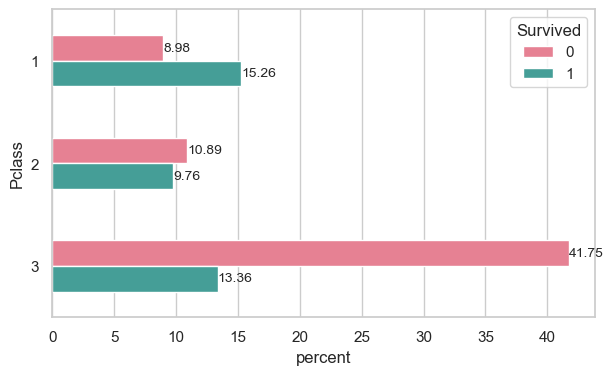

In [153]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(y='Pclass',data=titanic_df , hue='Survived', stat='percent', width=0.5 ,palette='husl')
for i in ax.containers:
    ax.bar_label(i, fontsize = 10, fmt='%.2f')

- In total 38.38% of passengers were survived.
- 15.26% were in class 1.
- 9.76% were in class 2.
- 13.36% were in class 3.

In [154]:
# percent of Survived passengers based on their classes
titanic_df.groupby(['Pclass']).Survived.mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

- 62.96% of class 1 were survived.
- 47.28% of class 2 were survived.
- 24.23% of class 3 were survived.

Being in the *first class* is more likely to be survived.

In [155]:
titanic_df.groupby('Pclass').Sex.value_counts()/titanic_df.shape[0]

Pclass  Sex   
1       male      0.136925
        female    0.105499
2       male      0.121212
        female    0.085297
3       male      0.389450
        female    0.161616
Name: count, dtype: float64

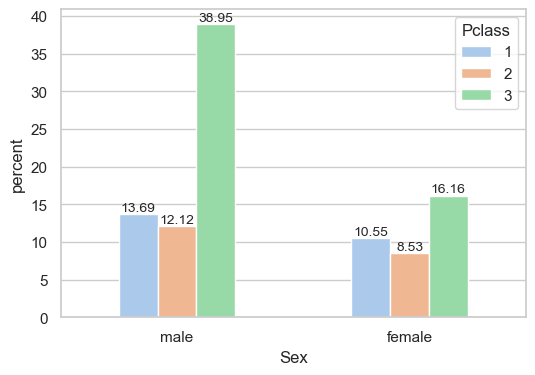

In [156]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = 'Sex', data= titanic_df, hue = 'Pclass', palette='pastel', width= 0.5, stat='percent')
for i in ax.containers:
    ax.bar_label(i, fontsize= 10, fmt='%.2f')

In [157]:
titanic_df.groupby(['Pclass', 'Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

In [158]:
# The mean of 'Age', 'Fare' and 'Survived' passengers in each group of classes and genders
titanic_df.groupby(['Pclass', 'Sex']).agg({'Age': 'mean', 'Fare': 'mean', 'Survived': 'mean'})

Age        Fare  Survived
Pclass Sex                                    
1      female  33.978723  106.125798  0.968085
       male    38.995246   67.226127  0.368852
2      female  28.703947   21.970121  0.921053
       male    30.512315   19.741782  0.157407
3      female  23.572917   16.118810  0.500000
       male    26.911873   12.661633  0.135447

*Class 1*: 
- 96.8% of women Survived. The average 'age' is 34 years old and the average fare that had been paid was 106.12
- 36.88% of men Survived. The average 'age' is 39 years old and the average fare that had been paid was 67.22

*Class 2*: 
- 92.10% of women Survived. The average 'age' is 28 years old and the average fare that had been paid was 21.97
- 15.74% of men Survived. The average 'age' is 30 years old and the average fare that had been paid was 19.74

*Class 3*: 
- 50% of women Survived. The average 'age' is 24 years old and the average fare that had been paid was 16.11
- 13.54% of men Survived. The average 'age' is 27 years old and the average fare that had been paid was 12.66

<Figure size 1500x500 with 0 Axes>

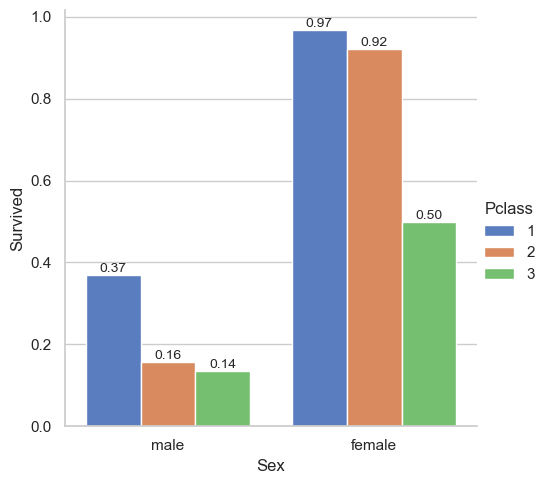

In [159]:
plt.figure(figsize=(15, 5))
g = sns.catplot(data=titanic_df , x="Sex", y="Survived", hue="Pclass", kind="bar", 
                 palette='muted', errorbar=None);

for ax in g.axes.flat:  # Handles multiple subplots if they exist
    for container in ax.containers:
        # Label each bar with its height
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)


- x="Sex": Group data by the Sex column (male/female).
- y="Survived": Calculate the mean survival rate for each group.
- hue="Pclass": Further divide the groups by passenger class.

Mostly women were alived, especially in Class 1 and Class 2

The effect of having a 'Cabin' on Surviving:

In [160]:
titanic_df['HasCabin'] = titanic_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [161]:
titanic_df['HasCabin'].value_counts()

HasCabin
0    687
1    204
Name: count, dtype: int64

C:\Users\RAYANEH INS\AppData\Local\Temp\ipykernel_17580\2610090630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'HasCabin', data = titanic_df, stat='percent', palette='husl', width= 0.5)


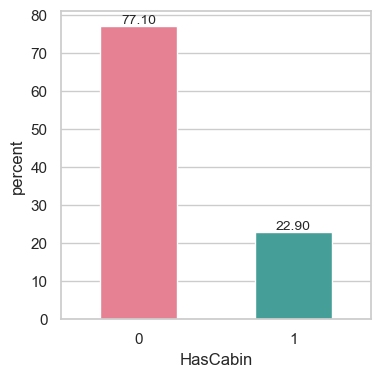

In [162]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x = 'HasCabin', data = titanic_df, stat='percent', palette='husl', width= 0.5)
for i in ax.containers:
    ax.bar_label(i, fontsize= 10, fmt = '%.2f');

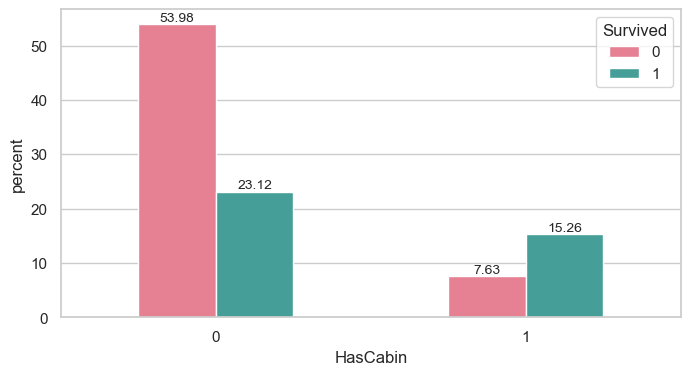

In [163]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = 'HasCabin', data = titanic_df, hue= 'Survived', stat = 'percent', palette= 'husl', width= 0.5)
for i in ax.containers:
    ax.bar_label(i, fontsize= 10, fmt='%.2f')

Having a *Cabin* is more likely to be survived.

<Figure size 1000x500 with 0 Axes>

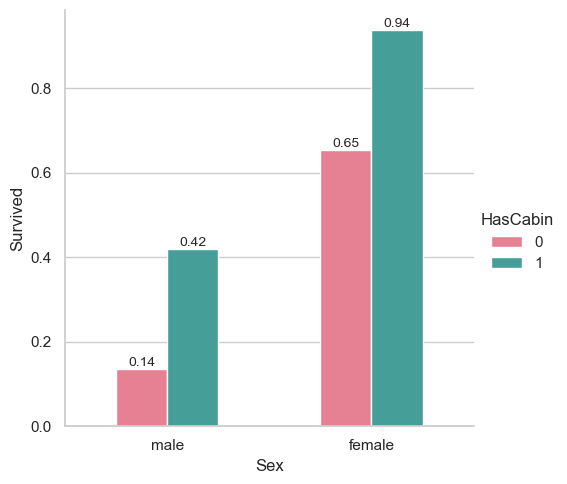

In [164]:
plt.figure(figsize=(10, 5))
g = sns.catplot(kind = 'bar', data = titanic_df, 
                x = 'Sex', y = 'Survived',  hue= 'HasCabin', 
                palette='husl', width= 0.5, errorbar=None)

for ax in g.axes.flat:
    for i in ax.containers:
        ax.bar_label(i, fontsize= 10, fmt='%.2f')

And being a woman and having a cabin is more likely to survive.

Let's see if the type of Cabin also have impact on being survived.

*CabinType:*

In [165]:
titanic_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [166]:
def ExtractType(cabin: str) -> 'CabinType':
    """ Extract type of each cabin. if there's no cabin it return M.
    Params:
        (str) Cabin
    Return:
        the Type of Cabin. If Null returns 'M'.
    """

    if pd.isnull(cabin):
        return 'M'
    
    prefix = pd.Series(cabin).str.extract(r'([A-Za-z])(\d)')[0]
    
    return prefix[0] if not prefix.isna().any() else 'M'

In [167]:
titanic_df['CabinType'] = titanic_df['Cabin'].apply(ExtractType)

In [168]:
titanic_df['CabinType'].value_counts().sort_index()

CabinType
A     15
B     47
C     59
D     30
E     33
F      9
G      7
M    691
Name: count, dtype: int64

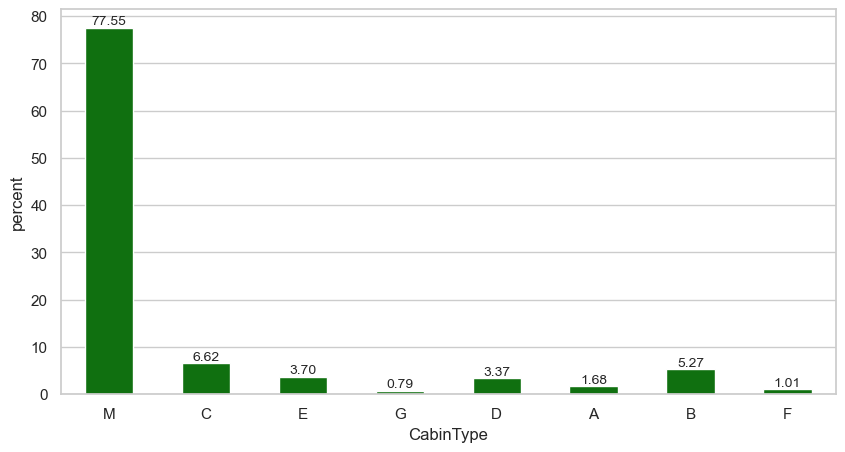

In [169]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data = titanic_df, x='CabinType', stat='percent', color='green', width=0.5)
for i in ax.containers:
    ax.bar_label(i, fontsize = 10, fmt='%.2f')

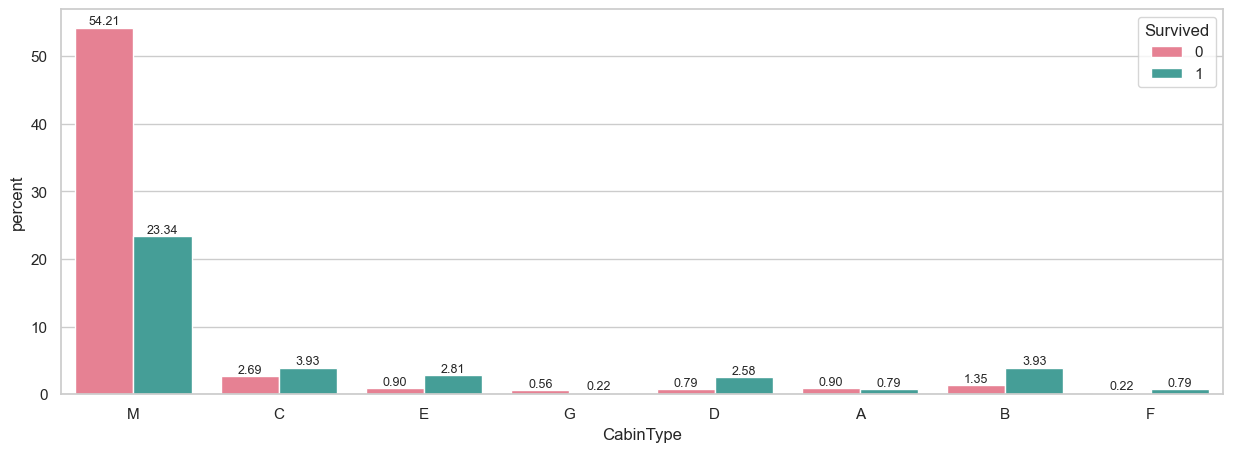

In [170]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data = titanic_df, x = 'CabinType', hue ='Survived', 
                   stat ='percent', palette ='husl')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, fmt='%.2f')

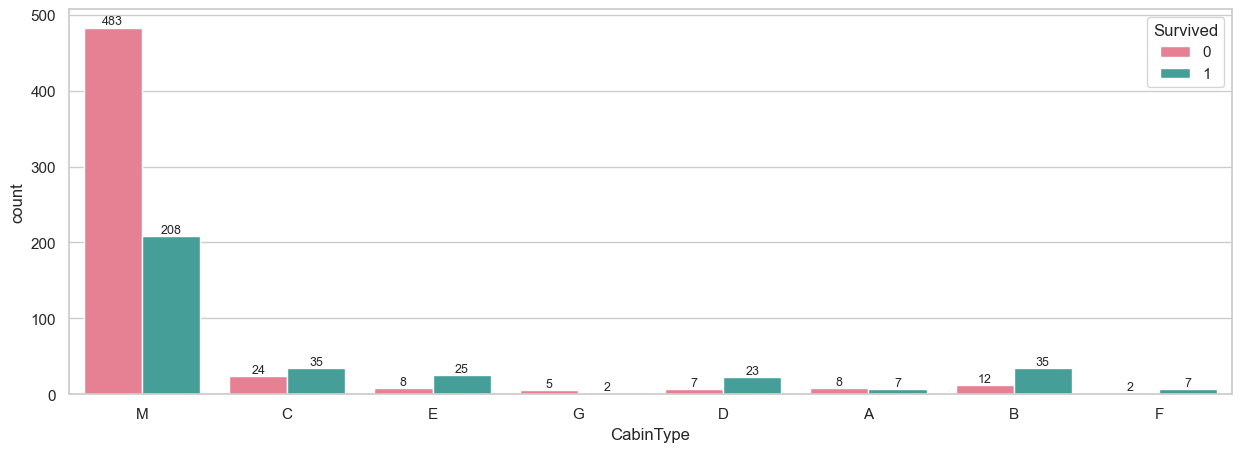

In [171]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=titanic_df, x = 'CabinType', hue='Survived', 
                   stat='count', palette='husl')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9)

Being in Cabins *B, D, E, F* is more likely to survive.

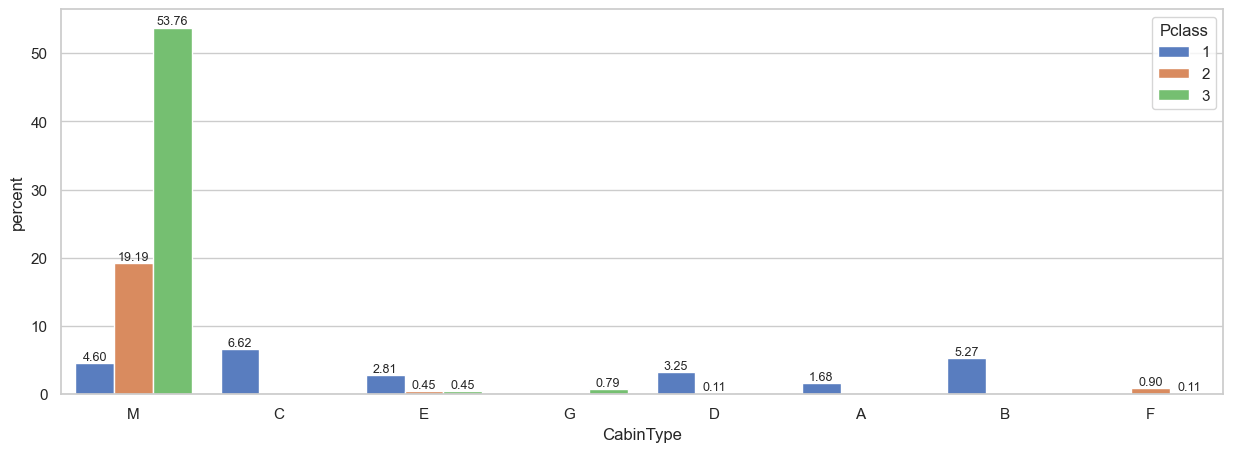

In [172]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=titanic_df, x = 'CabinType', hue='Pclass', 
                   stat='percent', palette='muted')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, fmt='%.2f')

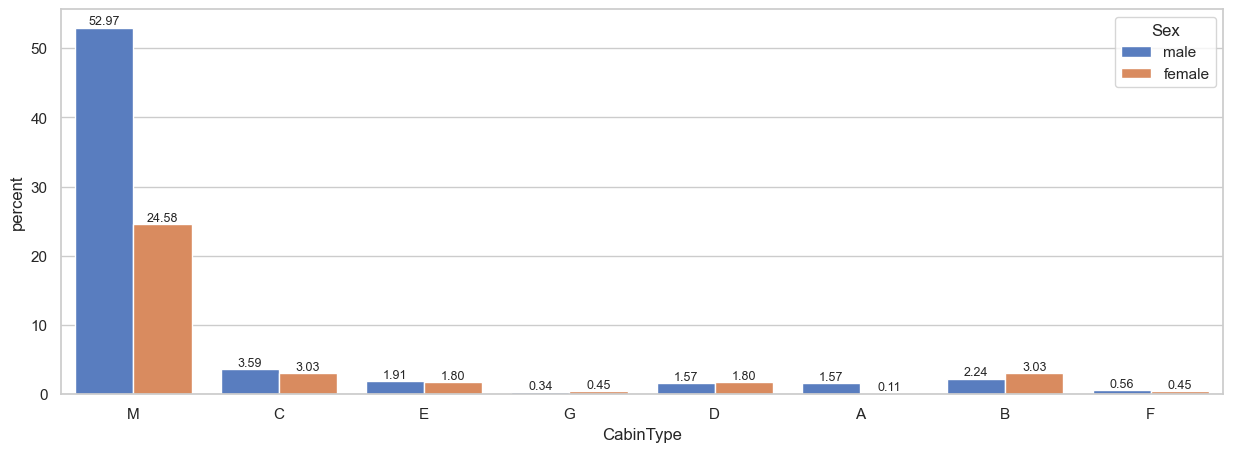

In [173]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=titanic_df, x = 'CabinType', hue='Sex', stat='percent', palette='muted')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, fmt='%.2f')

*'Embarked'*

indicates the port where the passenger boarded the Titanic.
- The port of embarkation can provide insight into the demographics of passengers and their socioeconomic status, which might correlate with survival rates

Is there any relationship between the kind of port the passengers embarked their trip and their Survivals?

In [174]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

C:\Users\RAYANEH INS\AppData\Local\Temp\ipykernel_17580\2525986468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=titanic_df, x = 'Embarked',


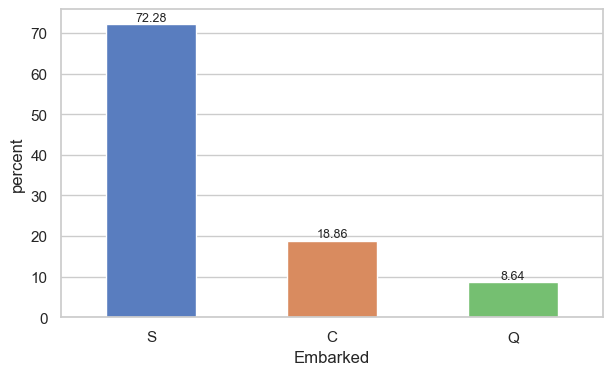

In [175]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=titanic_df, x = 'Embarked', 
                   stat='percent', palette='muted', width=0.5)
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, fmt='%.2f')

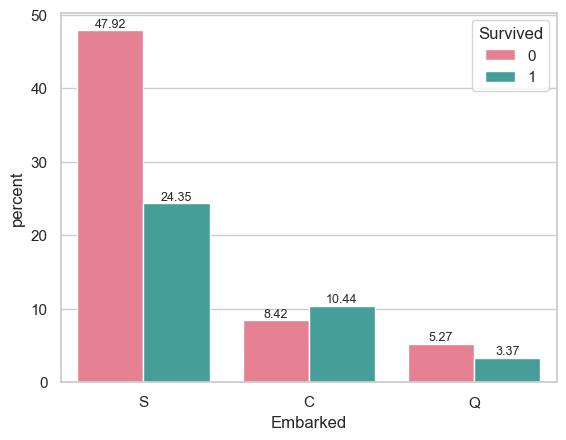

In [176]:
ax = sns.countplot(x='Embarked', data = titanic_df, hue='Survived', 
                   stat='percent', palette='husl')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, fmt='%.2f')

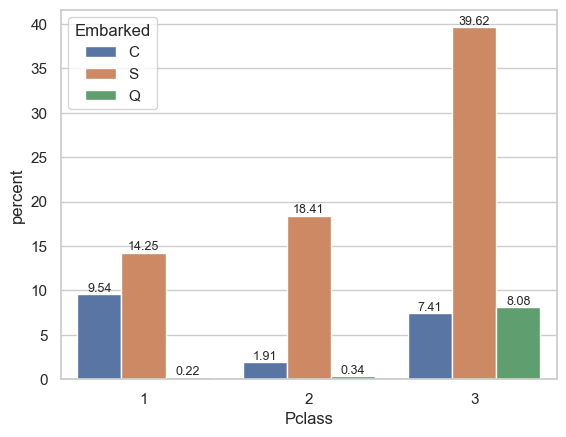

In [177]:
ax = sns.countplot(x='Pclass', data = titanic_df, hue='Embarked', stat='percent')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, fmt='%.2f')

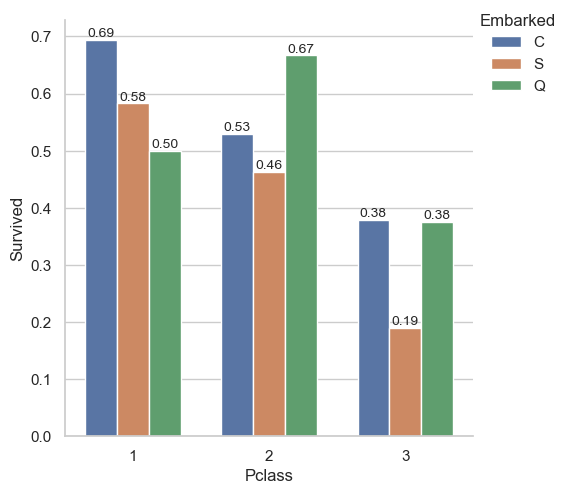

In [178]:
g = sns.catplot(kind = 'bar', data = titanic_df, x = 'Pclass', 
                y = 'Survived', hue= 'Embarked', errorbar= None, width = 0.7)
for ax in g.axes.flat:
    for i in ax.containers:
        ax.bar_label(i, fontsize=10, fmt = '%.2f')

g._legend.set_loc("upper right")

Classes based on these Ports were most Srvivals: 


- Class 1, Port: C
- Class 2, Port: Q
- Class 3, Port: C, Q

*'Fare'*

Is there the *Fare* has any impact on Surviving?

<Axes: xlabel='Fare', ylabel='Percent'>

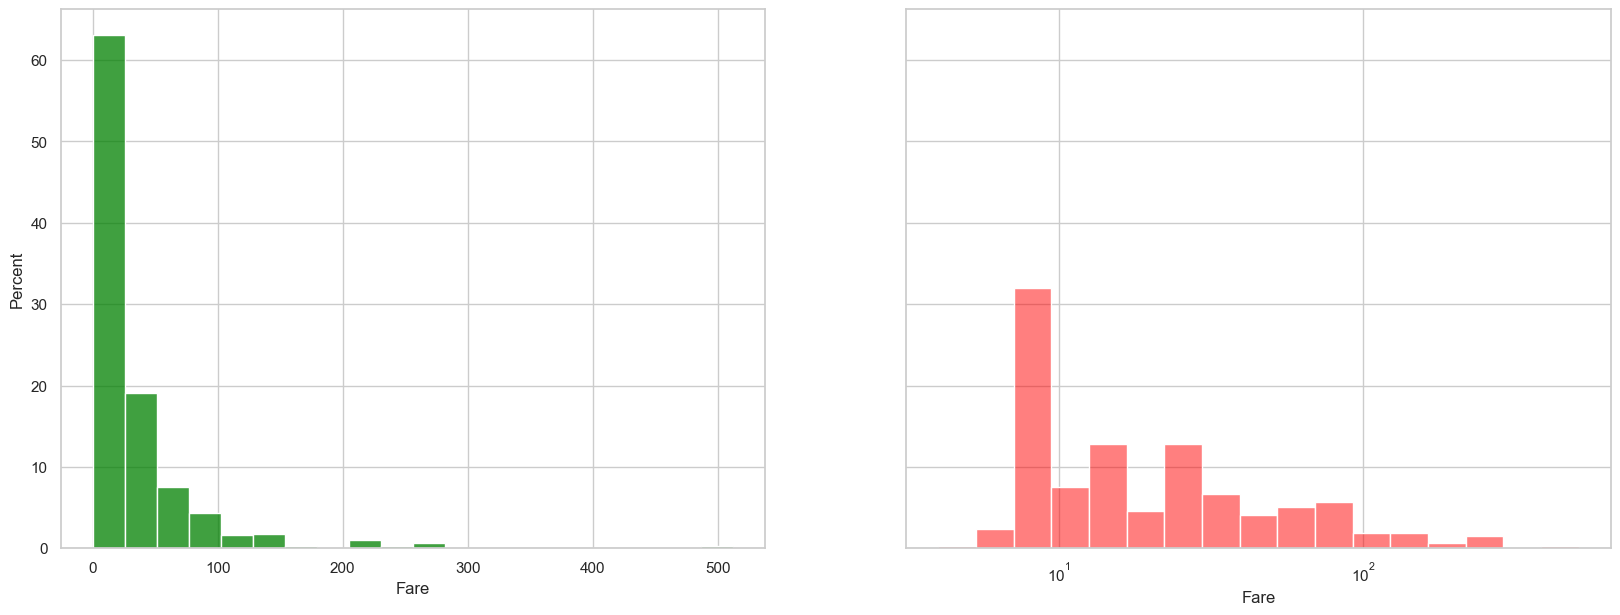

In [179]:
fig, axs = plt.subplots(1, 2, figsize = (20, 7), sharey= True)
sns.histplot(ax=axs[0] ,data=titanic_df, x='Fare', color='green', stat='percent', bins= 20)
sns.histplot(ax= axs[1], data=titanic_df, x='Fare', log_scale=(True, False), kde=True, color='red', stat='percent')


<Axes: xlabel='Fare', ylabel='Percent'>

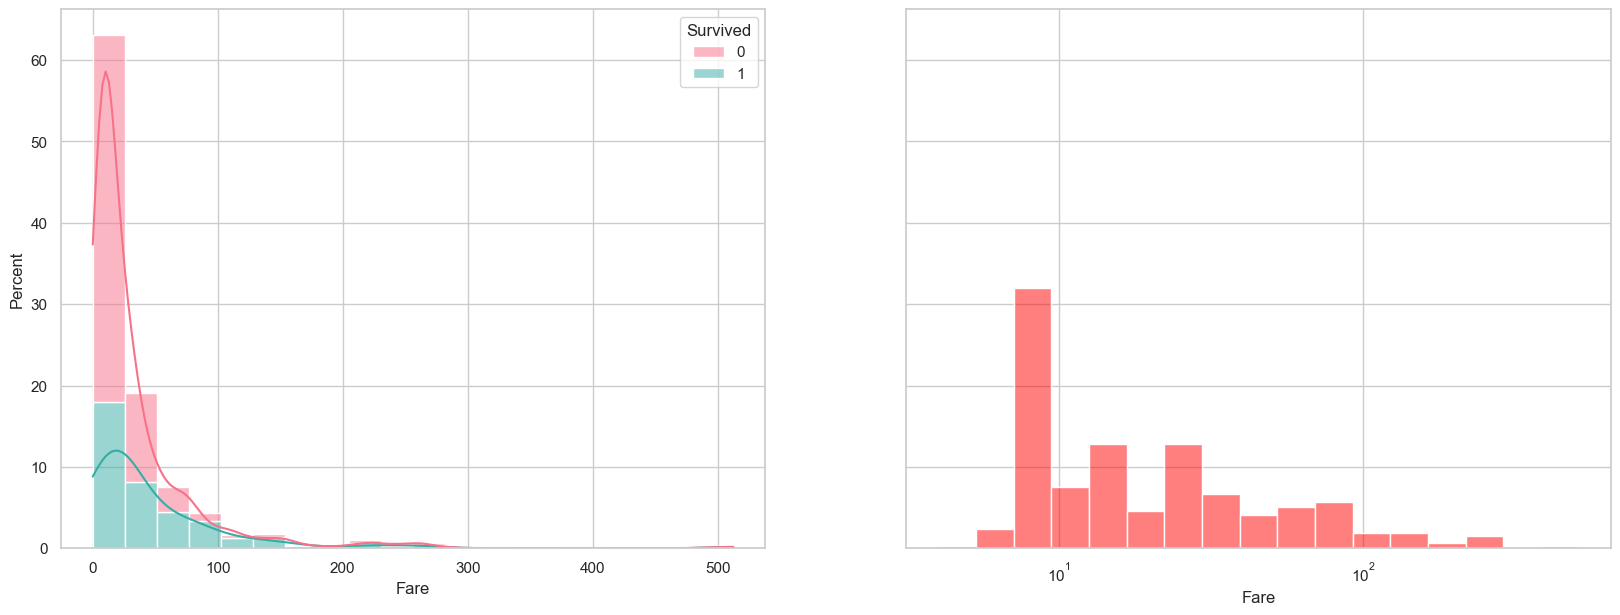

In [180]:
fig, axs = plt.subplots(1, 2, figsize = (20, 7), sharey= True)
sns.histplot(ax=axs[0] ,data=titanic_df, x='Fare', hue='Survived', 
             color='green', stat='percent', palette='husl',
             bins= 20, multiple='stack', kde=True)
sns.histplot(ax= axs[1], data=titanic_df, x='Fare', log_scale=(True, False), kde=True, color='red', stat='percent')

Maybe using the log of Fare is more efficient, as its distribution is better.

In [181]:
titanic_df['Fare'].mean()

32.204207968574636

In [182]:
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())

In [183]:
titanic_df['FareLog'] = np.log(titanic_df['Fare']+1)

<Axes: xlabel='FareLog', ylabel='Percent'>

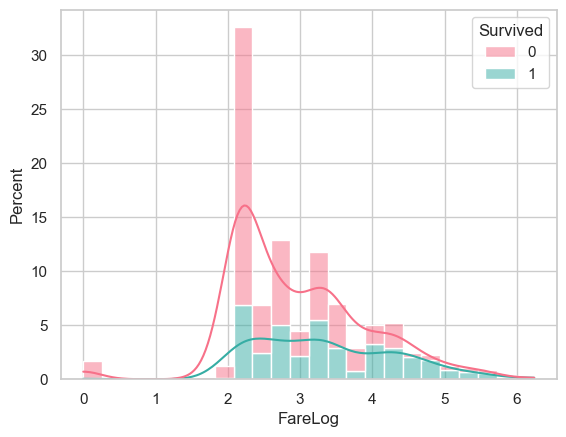

In [184]:
sns.histplot(data=titanic_df, x='FareLog', hue='Survived', stat='percent', multiple='stack', kde=True, palette='husl')

'*FareRange'*

In [185]:
def fare_rage(Fare: 'feature') -> 'FareRange':

    if  0. <= Fare < 100.:
        return 0
    if 100. <= Fare < 200.:
        return 1
    if 200. <= Fare < 300.:
        return 2
    if 300. <= Fare < 400.:
        return 3
    if Fare >= 400.:
        return 4
    else:
        return 'unknown'


In [186]:
# titanic_df['FareRange'] = pd.cut(titanic_df['Fare'], 
#                                 bins=[-5., 100., 200., 300, 400., np.inf],
#                                 labels=[1, 2, 3, 4, 5])

In [187]:
titanic_df['FareRange'] = titanic_df['Fare'].apply(fare_rage)

In [188]:
titanic_df['FareRange'].value_counts().sort_index()

FareRange
0    838
1     33
2     17
4      3
Name: count, dtype: int64

<Axes: xlabel='Fare', ylabel='Percent'>

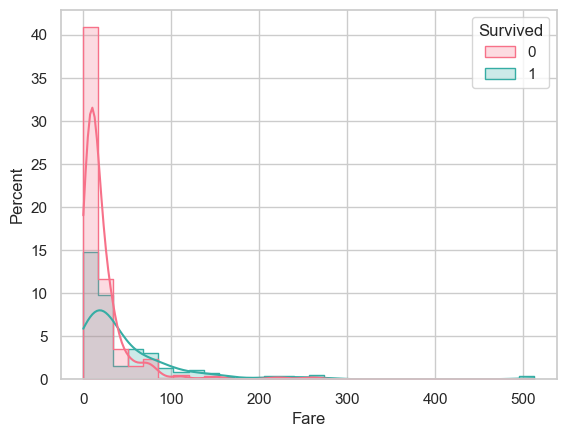

In [189]:
sns.histplot(data=titanic_df, x='Fare', hue='Survived',
              kde=True, bins=30, palette='husl', stat='percent', element='step')


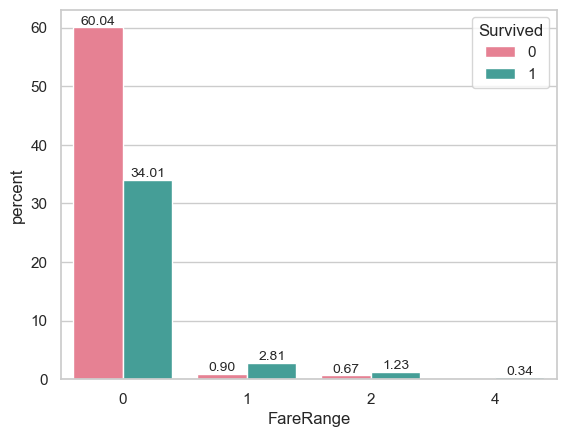

In [190]:
ax = sns.countplot(data=titanic_df, x='FareRange', hue = 'Survived',
            palette='husl', stat='percent')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', fontsize = 10)

Passengers were survived based on their age range on each class:

<Figure size 2000x700 with 0 Axes>

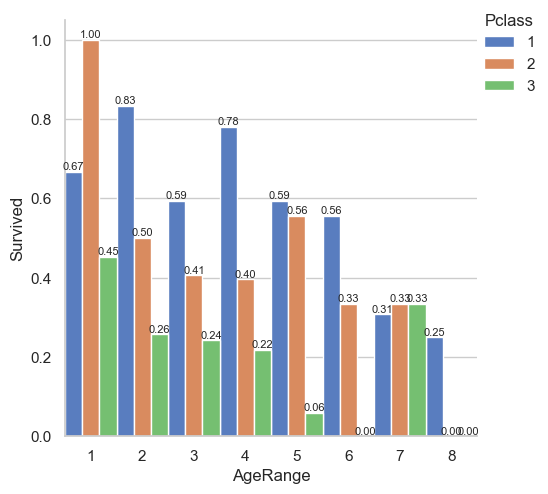

In [241]:
plt.figure(figsize=(20, 7))
g = sns.catplot(kind = 'bar', data = titanic_df, 
                x = 'AgeRange', y = 'Survived', hue= 'Pclass', 
                errorbar= None, width = 1,
                palette='muted'
                )
for ax in g.axes.flat:
    for i in ax.containers:
        ax.bar_label(i, fontsize=8, fmt = '%.2f')

g._legend.set_loc("upper right")
# g.tick_params(axis='x', rotation = 70)

*SibSp* :  number of siblings/spouses (SibSp)

- families might have a different survival strategy compared to single travelers.

In [192]:
titanic_df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [193]:
(titanic_df[titanic_df.Survived == 1]['SibSp'] / titanic_df['SibSp']).value_counts()

SibSp
1.0    132
Name: count, dtype: int64

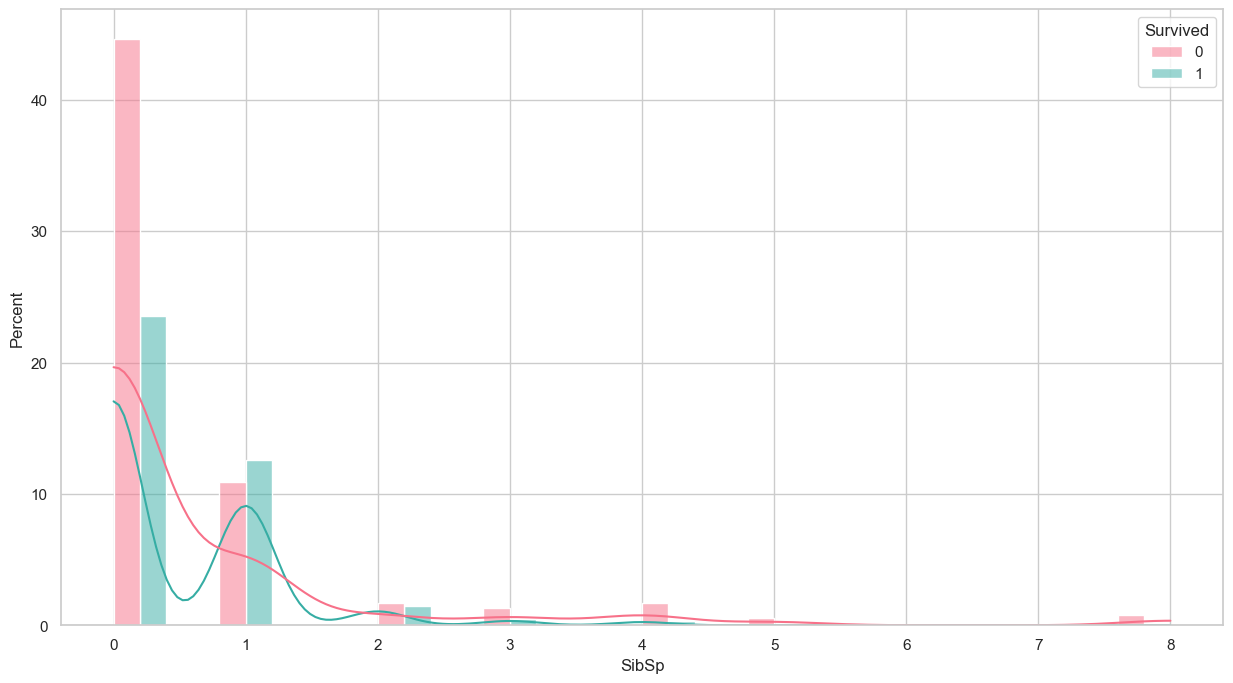

In [194]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(data= titanic_df, x= 'SibSp', 
                  hue='Survived', stat= 'percent', 
                  palette='husl', multiple= 'dodge',
                  kde= True, bins=20, )

# for i in ax.containers:
#     ax.bar_label(i, fontsize=12, fmt='%.2f')

Passengers who had a *Sibling* or *Spouse* where more likely to Survive.

*Parch*

'Parch' is "Parent/Child" situation and indicates the number of parents or children that a passenger had aboard the Titanic. For example, 'Parch = 0' means the passenger had no parents or children on board, while a value of 1 means they had one parent or child


In [195]:
titanic_df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

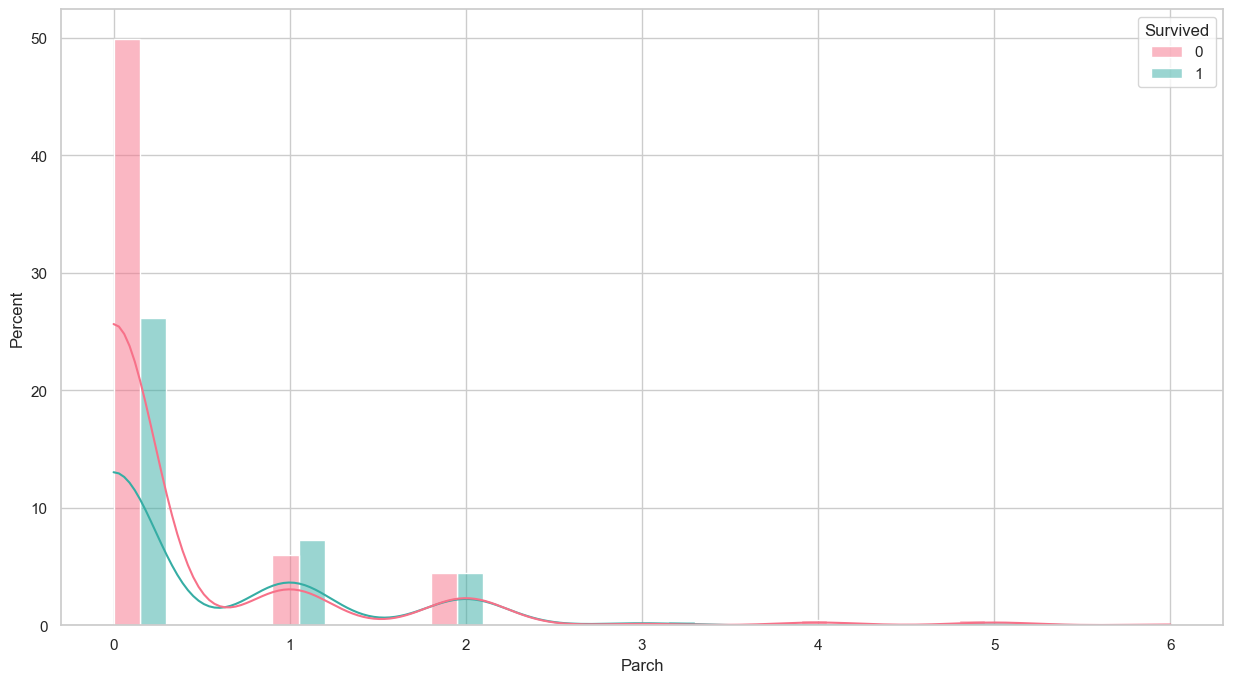

In [196]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(data= titanic_df, x= 'Parch', 
                  hue='Survived', stat= 'percent', 
                  palette='husl', multiple= 'dodge',
                  kde= True, bins=20, )


In [197]:
titanic_df['IsAlone'] = ((titanic_df['Parch'] == 0) & (titanic_df['SibSp'] == 0)).astype(int)

In [198]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeRange     891 non-null    int64  
 13  HasCabin     891 non-null    int64  
 14  CabinType    891 non-null    object 
 15  FareLog      891 non-null    float64
 16  FareRange    891 non-null    int64  
 17  IsAlone      891 non-null    int32  
dtypes: float64(3), int32(1), int64(8), object(6)
memor

Passengers who had a *Child* or a *Parent* were more likely to Survive.

*'FamilySize'*

In [199]:
FamilySize = titanic_df['Parch'] + titanic_df['SibSp']

In [200]:
titanic_df['FamilySize'] = FamilySize

In [201]:
titanic_df['FamilySize'].value_counts().sort_index()

FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64

*'FamilyCat'*

In [202]:
def FamilyCategory(FamilySize: int) -> str:
    """
    Categorize family size into different categories.

    Parameters:
    FamilySize (int): the number of famliy members.

    Returns:
    str: The Category of the family size ('Alone', 'Small', 'Middle', 'Large')
    """

    if FamilySize == 0:
        return 'Alone'
    elif 1 <= FamilySize <= 3:
        return 'Small'
    elif 4 <= FamilySize <= 5:
        return 'Middle'
    elif FamilySize >= 6:
        return 'Large'
    else:
        return 'Unknown'

In [203]:
titanic_df['FamilyCat'] = titanic_df['FamilySize'].apply(FamilyCategory) 

In [204]:
titanic_df['FamilyCat'].value_counts().sort_index()

FamilyCat
Alone     537
Large      25
Middle     37
Small     292
Name: count, dtype: int64

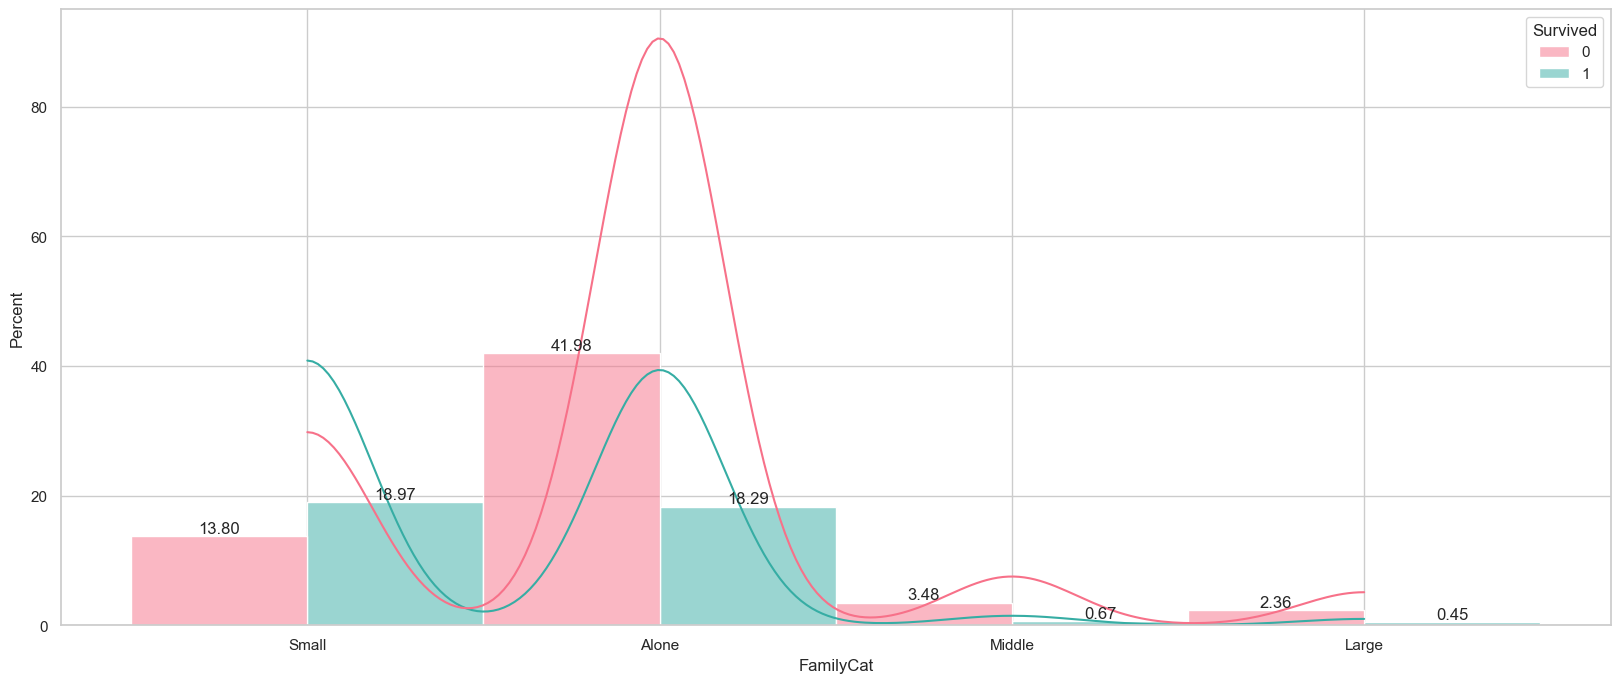

In [205]:
plt.figure(figsize=(20, 8))
ax = sns.histplot(data= titanic_df, x= 'FamilyCat', 
                  hue='Survived', stat= 'percent', 
                  palette='husl', multiple= 'dodge',
                  kde= True, bins=30, )


for i in ax.containers:
    ax.bar_label(i, fontsize=12, fmt='%.2f')

- *Small* group of families has the most chance to survive.

*Title* 
- The title of each passenger can make differences in surviving that person.

In [206]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [207]:
titanic_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

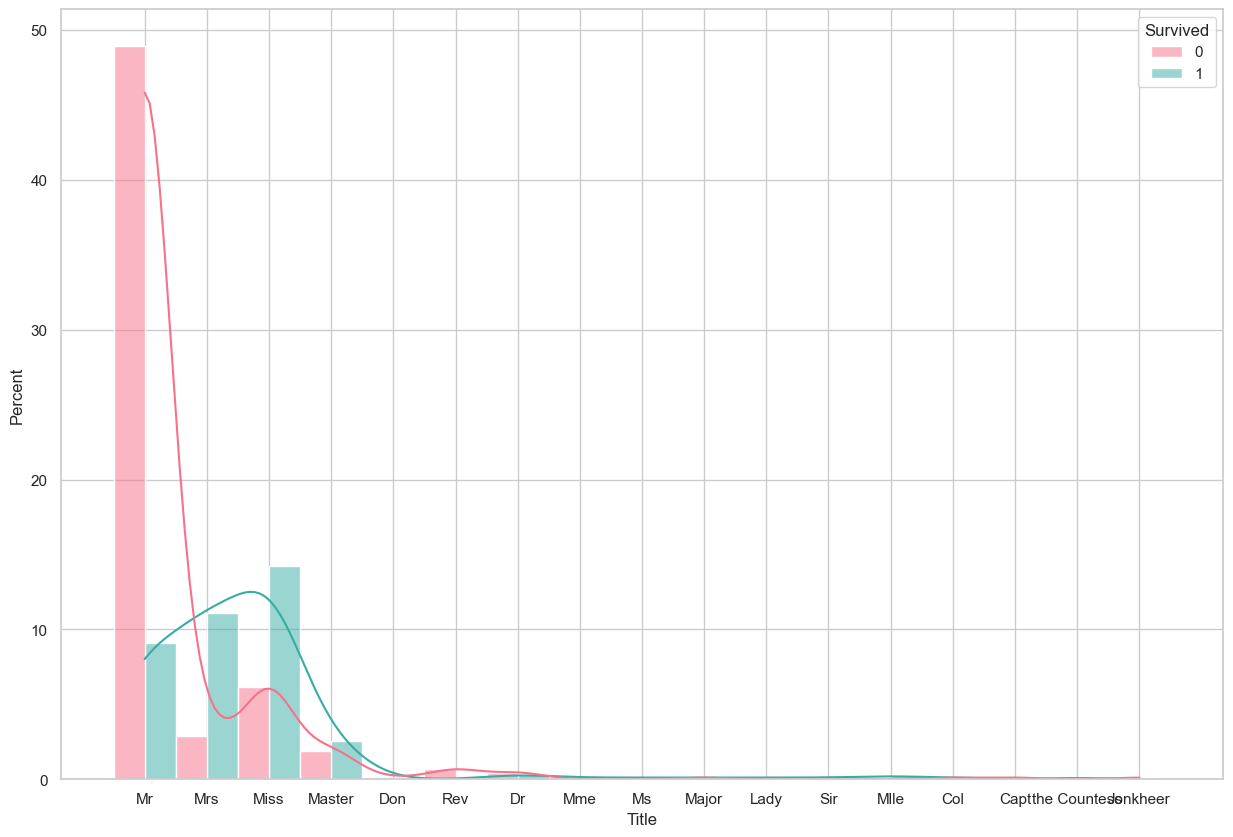

In [208]:
plt.figure(figsize=(15, 10))
ax = sns.histplot( data= titanic_df, x='Title', hue='Survived', 
                   stat= 'percent', kde= True, 
                   multiple='dodge', 
                   bins=30, palette='husl',)
# for i in ax.containers:
#     ax.bar_label(i)

*TicketType*
- check if there is a pattern in specific names and prefixes of Ticket's numbers.

In [209]:
titanic_df['Ticket_Frequency'] = titanic_df.groupby('Ticket')['Ticket'].transform('count')

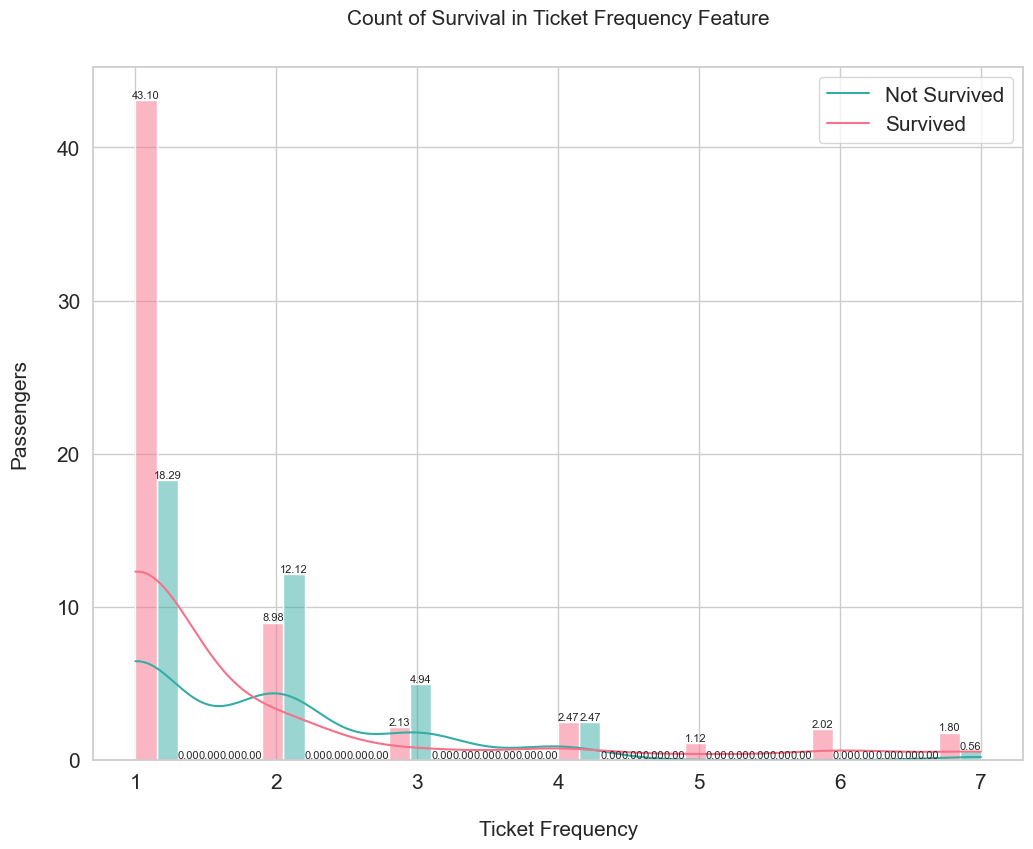

In [210]:
plt.subplots(figsize=(12, 9))
ax = sns.histplot(x='Ticket_Frequency', hue='Survived', data=titanic_df, palette='husl', 
                  stat='percent', multiple='dodge', kde=True, bins= 20)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passengers', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

for i in ax.containers:
    ax.bar_label(i, fontsize= 8, fmt='%.2f')
plt.show()



In [211]:
ordinal_enccoder = OrdinalEncoder()
titanic_df['SexEncode'] = ordinal_enccoder.fit_transform(titanic_df[['Sex']])

In [212]:
titles= {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 
        'Dr': 5, 'Rev': 6, 'Mlle': 7, 'Major': 8, 
        'Col': 9, 'the Countess': 10, 'Capt': 11,
        'Ms': 12, 'Sir': 13, 'Lady': 14, 'Mme': 15, 
        'Don': 16, 'Jonkheer': 17}

In [213]:
titanic_df['Title'] = titanic_df['Title'].map(titles)

In [214]:
titanic_df['Title'].value_counts()

Title
1     517
2     182
3     125
4      40
5       7
6       6
7       2
8       2
9       2
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
Name: count, dtype: int64

In [215]:
titanic_df['CabinType'].value_counts().sort_index()

CabinType
A     15
B     47
C     59
D     30
E     33
F      9
G      7
M    691
Name: count, dtype: int64

In [216]:
cab_titles = {'A':1, 'B':2, 'C':3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'M': 8}

In [217]:
titanic_df['CabinName'] = titanic_df['CabinType'].map(cab_titles)

In [218]:
titanic_df['CabinName'].value_counts().sort_index()

CabinName
1     15
2     47
3     59
4     30
5     33
6      9
7      7
8    691
Name: count, dtype: int64

In [219]:
emb_titles = {'S': 1, 'C': 2, 'Q': 3}

In [220]:
titanic_df['Embarked'] = titanic_df['Embarked'].map(emb_titles)

In [221]:
titanic_df['AgeLog'] = np.log(titanic_df['Age']+1)

In [222]:
titanic_df['FamilyCat'].value_counts()

FamilyCat
Alone     537
Small     292
Middle     37
Large      25
Name: count, dtype: int64

In [223]:
family_cat = {'Alone': 1, 'Small': 2, 'Middle': 3, 'Large': 4}

In [224]:
titanic_df['FamilyCat'] = titanic_df['FamilyCat'].map(family_cat)

In [225]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    float64
 12  AgeRange          891 non-null    int64  
 13  HasCabin          891 non-null    int64  
 14  CabinType         891 non-null    object 
 15  FareLog           891 non-null    float64
 16  FareRange         891 non-null    int64  
 1

In [226]:
corr_ = titanic_df.corr(numeric_only=True)

In [227]:
corr_['Survived']

PassengerId        -0.005007
Survived            1.000000
Pclass             -0.338481
Age                -0.064910
SibSp              -0.035322
Parch               0.081629
Fare                0.257307
Embarked            0.108669
AgeRange           -0.052184
HasCabin            0.316912
FareLog             0.329862
FareRange           0.165780
IsAlone            -0.203367
FamilySize          0.016639
FamilyCat           0.077333
Title               0.294715
Ticket_Frequency    0.038247
SexEncode          -0.543351
CabinName          -0.293865
AgeLog             -0.116024
Name: Survived, dtype: float64

In [228]:
corr_col = ['Survived','SibSp', 'Parch', 'Pclass', 'Embarked', 'HasCabin', 'IsAlone', 'Title', 'FareLog', 'SexEncode', 'CabinName', 'AgeLog', 'FamilyCat', 'Ticket_Frequency']

In [229]:
correlations = titanic_df[corr_col].corr(numeric_only=True)

In [230]:
correlations['Survived']

Survived            1.000000
SibSp              -0.035322
Parch               0.081629
Pclass             -0.338481
Embarked            0.108669
HasCabin            0.316912
IsAlone            -0.203367
Title               0.294715
FareLog             0.329862
SexEncode          -0.543351
CabinName          -0.293865
AgeLog             -0.116024
FamilyCat           0.077333
Ticket_Frequency    0.038247
Name: Survived, dtype: float64

<Axes: >

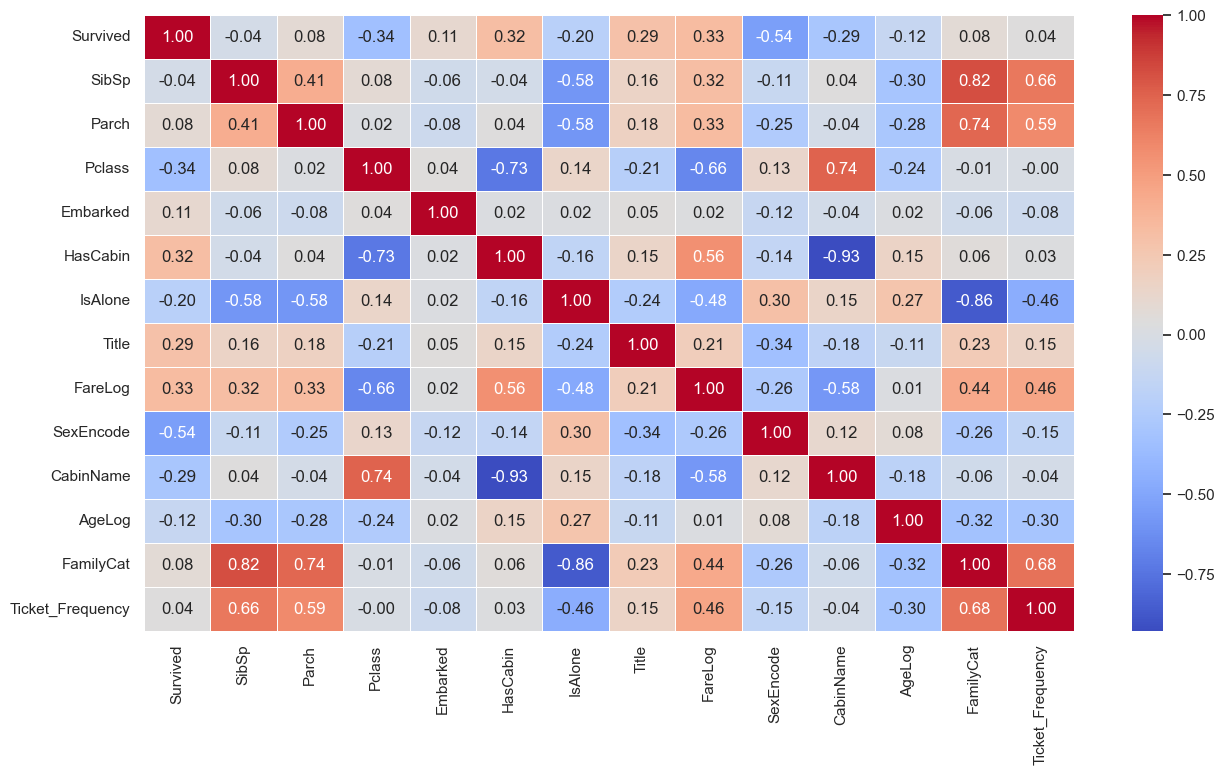

In [239]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlations, annot=True, fmt='.2f', linewidth=.5, cmap='coolwarm' )

It seems it's better to drop some columns: (SibSp, Parch)Maybe, TicketFrequency, FamilyCat.

Also Scale the data

Split train and test

find a good model

check Accuracy, precision, Recall, ROC Curve.

In [232]:
data = titanic_df.drop(columns=['PassengerId', 'SibSp', 'Parch', 'Ticket_Frequency', 'FamilyCat', 'Name', 'Sex', 'Ticket', 'FareRange', 'Cabin', 'AgeRange', 'CabinType', 'FamilySize'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   Embarked   889 non-null    float64
 5   HasCabin   891 non-null    int64  
 6   FareLog    891 non-null    float64
 7   IsAlone    891 non-null    int32  
 8   Title      891 non-null    int64  
 9   SexEncode  891 non-null    float64
 10  CabinName  891 non-null    int64  
 11  AgeLog     891 non-null    float64
dtypes: float64(6), int32(1), int64(5)
memory usage: 80.2 KB


In [233]:
corrs = data.corr()

<Axes: >

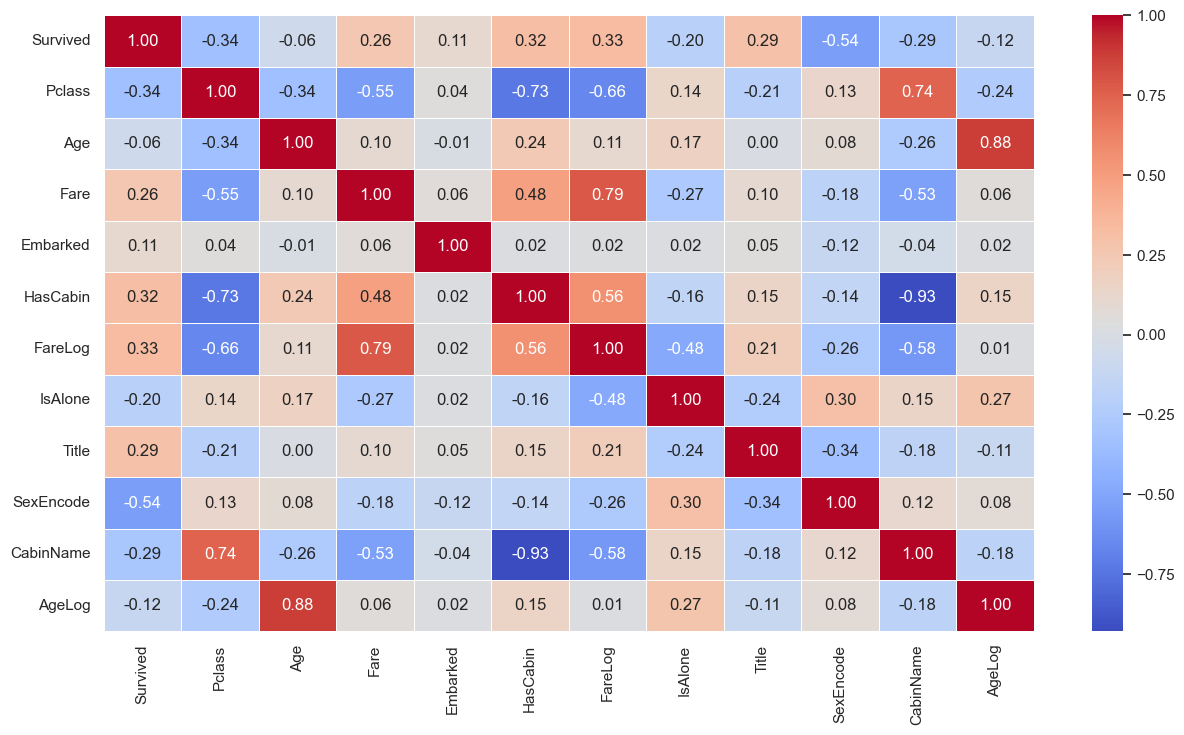

In [234]:
plt.figure(figsize=(15, 8))
sns.heatmap(corrs, annot=True, fmt='.2f', linewidth=.5, cmap='coolwarm' )

*PassengerId*, *Name*, *Ticket* and *Cabin* won't help us in predicting the survivals. So we can drop this columns in predicting.

*Sex, Pclass, HasCabin, FareLog, Title* and *CabinName* have the most impact on our data.